<a href="https://www.kaggle.com/code/dilekdd/predicting-house-prices?scriptVersionId=202739452" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

For business problem, datasets and everything else related to the competition, please refer to this link; https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data 

In [1]:
# importing the libraries and loading the  datasets
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.options.display.max_columns=100
pd.options.display.max_rows=100
pd.options.display.width=1000


train = pd.read_csv("/kaggle/input/house-price-dataset/train.csv").drop("Id",axis=1)
test = pd.read_csv("/kaggle/input/house-price-dataset/test.csv").drop("Id",axis=1)
sub = pd.read_csv("/kaggle/input/house-price-dataset/sample_submission.csv")

In [2]:
# Open the file "data_description.txt" in read mode and assign the content to the variable 'desc'
with open("/kaggle/input/house-price-dataset/data_description.txt", "r") as file:
    desc = file.readlines()  # Read all lines of the file into a list

# Define a function 'what' that takes a 'question' as an argument
def what(question):
    import re  # Import the 're' module for regular expressions
    # Create a regular expression pattern to find the line containing the 'question'
    row = re.compile(f"{question}.*?\n").search(" ".join(desc))
    
    # If the pattern finds a match, return and print the matched row
    if row:
        row = row.group(0)  # Get the matched text
        return print(row)
    else:
        # If no match is found, print a message indicating the question couldn't be found
        return print(f"{question} couldn't find in description, check it please..", end="\n\n")


# For Turkish version
# with open ("machine_learning/House_Price_Regression/data_turkish.txt", "r", encoding="utf8") as file:
#     desc_turkish = file.readlines()

# def nedir(question):
#     import re
#     row = re.compile(f"{question}.*?\n").search(" ".join(desc_turkish))
#     if row:
#         row = row.group(0)
#         return print(row)
#     else:
#         return print(f"{question} couldn't find in description, check it please..", end="\n\n")

In [3]:
# Concatenate the 'train' and 'test' DataFrames, adding a 'group' column to distinguish between them.
# The 'assign()' function is used to add a new column 'group' with values "train" for the 'train' DataFrame 
# and "test" for the 'test' DataFrame.
df = pd.concat(
    [
        train.assign(group="train"),  # Add a 'group' column to the 'train' DataFrame with the value "train"
        test.assign(group="test")    # Add a 'group' column to the 'test' DataFrame with the value "test"
    ], 
    axis=0,  # Concatenate along rows (stack 'train' and 'test' vertically)
    ignore_index=True  # Ignore the original index, create a new continuous index for the combined DataFrame
)

In [4]:
df.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,group
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0,train
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,NaN,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0,train
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0,train
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,NaN,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0,train
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0,train


In [5]:
df.tail()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,group
2914,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,7,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Gd,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,5,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN,test
2915,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,TwnhsE,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,NaN,0.0,TA,TA,CBlock,TA,TA,No,Rec,252.0,Unf,0.0,294.0,546.0,GasA,TA,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,CarPort,1970.0,Unf,1.0,286.0,TA,TA,Y,0,24,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN,test
2916,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1Story,5,7,1960,1996,Gable,CompShg,VinylSd,VinylSd,NaN,0.0,TA,TA,CBlock,TA,TA,No,ALQ,1224.0,Unf,0.0,0.0,1224.0,GasA,Ex,Y,SBrkr,1224,0,0,1224,1.0,0.0,1,0,4,1,TA,7,Typ,1,TA,Detchd,1960.0,Unf,2.0,576.0,TA,TA,Y,474,0,0,0,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN,test
2917,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,SFoyer,5,5,1992,1992,Gable,CompShg,HdBoard,Wd Shng,NaN,0.0,TA,TA,PConc,Gd,TA,Av,GLQ,337.0,Unf,0.0,575.0,912.0,GasA,TA,Y,SBrkr,970,0,0,970,0.0,1.0,1,0,3,1,TA,6,Typ,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,Y,80,32,0,0,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN,test
2918,60,RL,74.0,9627,Pave,NaN,Reg,Lvl,AllPub,Inside,Mod,Mitchel,Norm,Norm,1Fam,2Story,7,5,1993,1994,Gable,CompShg,HdBoard,HdBoard,BrkFace,94.0,TA,TA,PConc,Gd,TA,Av,LwQ,758.0,Unf,0.0,238.0,996.0,GasA,Ex,Y,SBrkr,996,1004,0,2000,0.0,0.0,2,1,3,1,TA,9,Typ,1,TA,Attchd,1993.0,Fin,3.0,650.0,TA,TA,Y,190,48,0,0,0,0,NaN,NaN,NaN,0,11,2006,WD,Normal,NaN,test


In [6]:
# Define a function to identify numeric, ordinal, and categorical columns in a DataFrame.
# 'data' is the input DataFrame, and 'ord_th' is the threshold for determining ordinal columns.
def find_col_dtypes(data, ord_th):
    # Get a list of columns that have numerical data types (e.g., int, float).
    num_cols = data.select_dtypes("number").columns.to_list()
    
    # Get a list of columns that have object data types (typically strings, used for categorical variables).
    cat_cols = data.select_dtypes("object").columns.to_list()
    
    # Identify ordinal columns from numeric ones based on the uniqueness threshold ('ord_th').
    # An ordinal column is considered to have fewer unique values than the specified threshold.
    ordinals = [col for col in num_cols if data[col].nunique() < ord_th]
    
    # Update the 'num_cols' list to exclude the columns identified as ordinal.
    num_cols = [col for col in num_cols if col not in ordinals]
    
    # Return the lists of numerical columns, ordinal columns, and categorical columns, along with their counts.
    return num_cols, ordinals, cat_cols, len(num_cols), len(ordinals), len(cat_cols)


# Use the function 'find_col_dtypes' on the 'test' DataFrame, setting the threshold for ordinals to 20.
# It returns lists of numerical, ordinal, and categorical columns, as well as their counts.
num_cols, ordinals, cat_cols, num_count, ord_count, cat_count = find_col_dtypes(test, 20)

# Print the lists of numerical, categorical, and ordinal columns.
print(f"Num Cols: {num_cols}", end="\n\n")  # Print the list of numerical columns.
print(f"Cat Cols: {cat_cols}", end="\n\n")  # Print the list of categorical columns.
print(f"Ordinal Cols: {ordinals}")          # Print the list of ordinal columns.

# Print the counts of each column type.
print(f"Num Cols {num_count}")  # Print the count of numerical columns.
print(f"Cat Cols {cat_count}")  # Print the count of categorical columns.
print(f"Ordinal Cols: {ord_count}")  # Print the count of ordinal columns.

# # Display the first few rows of the DataFrame for each type of column.
# df[num_cols].head()  # Show the first few rows for the numerical columns.
# df[ordinals].head()  # Show the first few rows for the ordinal columns.
# df[cat_cols].head()  # Show the first few rows for the categorical columns.

Num Cols: ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MiscVal']

Cat Cols: ['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']

Ordinal Cols: ['MSSubClass', 'OverallQual', 'OverallCond', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'Be

In [7]:
# Display the first few rows of the DataFrame for each type of column.
df[num_cols].head()  # Show the first few rows for the numerical columns.

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,GrLivArea,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,ScreenPorch,MiscVal
0,65.0,8450,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,1710,2003.0,548.0,0,61,0,0,0
1,80.0,9600,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,1262,1976.0,460.0,298,0,0,0,0
2,68.0,11250,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,1786,2001.0,608.0,0,42,0,0,0
3,60.0,9550,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,1717,1998.0,642.0,0,35,272,0,0
4,84.0,14260,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,2198,2000.0,836.0,192,84,0,0,0


In [8]:
df[ordinals].head()  # Show the first few rows for the ordinal columns.

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MoSold,YrSold
0,60,7,5,0,1.0,0.0,2,1,3,1,8,0,2.0,0,0,2,2008
1,20,6,8,0,0.0,1.0,2,0,3,1,6,1,2.0,0,0,5,2007
2,60,7,5,0,1.0,0.0,2,1,3,1,6,1,2.0,0,0,9,2008
3,70,7,5,0,1.0,0.0,1,0,3,1,7,1,3.0,0,0,2,2006
4,60,8,5,0,1.0,0.0,2,1,4,1,9,1,3.0,0,0,12,2008


In [9]:
df[cat_cols].head()  # Show the first few rows for the categorical columns.

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,NaN,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,NaN,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [10]:
# For numerical columns, generate descriptive statistics, including specific percentiles.
# 'describe()' gives statistics like mean, standard deviation, min, max, and specified percentiles (0.01, 0.25, 0.75, 0.99).
# '.T' transposes the result for better readability, making rows become columns.
df[num_cols].describe([0.01, 0.25, 0.75, 0.99]).T

,count,mean,std,min,1%,25%,50%,75%,99%,max
LotFrontage,2433.0,69.305795,23.344905,21.0,21.00,59.0,68.0,80.0,135.68,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,1680.00,7478.0,9453.0,11570.0,33038.64,215245.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1900.00,1953.5,1973.0,2001.0,2008.00,2010.0
YearRemodAdd,2919.0,1984.264474,20.894344,1950.0,1950.00,1965.0,1993.0,2004.0,2009.00,2010.0
MasVnrArea,2896.0,102.201312,179.334253,0.0,0.00,0.0,0.0,164.0,771.05,1600.0
BsmtFinSF1,2918.0,441.423235,455.610826,0.0,0.00,0.0,368.5,733.0,1635.32,5644.0
BsmtFinSF2,2918.0,49.582248,169.205611,0.0,0.00,0.0,0.0,0.0,874.66,1526.0
BsmtUnfSF,2918.0,560.772104,439.543659,0.0,0.00,220.0,467.0,805.5,1776.49,2336.0
TotalBsmtSF,2918.0,1051.777587,440.766258,0.0,0.00,793.0,989.5,1302.0,2198.30,6110.0
1stFlrSF,2919.0,1159.581706,392.362079,334.0,520.00,876.0,1082.0,1387.5,2288.02,5095.0


In [11]:
# For categorical columns, generate descriptive statistics specifically for object (string) type columns.
# 'describe(include="object")' provides information like count, unique values, the most frequent value (top), and its frequency (freq).
# '.T' transposes the result to make it more readable by displaying the summary as rows instead of columns.
df[cat_cols].describe(include="object").T

,count,unique,top,freq
MSZoning,2915,5,RL,2265
Street,2919,2,Pave,2907
Alley,198,2,Grvl,120
LotShape,2919,4,Reg,1859
LandContour,2919,4,Lvl,2622
Utilities,2917,2,AllPub,2916
LotConfig,2919,5,Inside,2133
LandSlope,2919,3,Gtl,2778
Neighborhood,2919,25,NAmes,443
Condition1,2919,9,Norm,2511


In [12]:
# Define a function to detect and optionally handle outliers in the specified columns of a DataFrame.
# Parameters:
# - df: Input DataFrame.
# - cols: List of column names to check for outliers.
# - take_care_outliers: If True, adjusts the outliers to the upper or lower bounds.
# - print_outliers: If True, returns a DataFrame summarizing the outliers' stats.
# - q_1 and q_3: Quantiles for calculating the interquartile range (IQR). Default is 0.25 (25th percentile) and 0.75 (75th percentile).

def outlier_detector(df, cols, take_care_outliers=False, print_outliers=False, q_1=0.25, q_3=0.75):
    # Create an empty DataFrame to store the summary of outliers.
    temp = pd.DataFrame()
    # Make a copy of the input DataFrame to avoid modifying the original data.
    data = df.copy()

    # Loop through each column in the specified columns list.
    for col in cols:
        # Calculate the lower and upper quantiles.
        q1 = data[col].quantile(q_1)
        q3 = data[col].quantile(q_3)
        # Calculate the interquartile range (IQR).
        IQR = q3 - q1
        # Define the upper and lower limits for outliers.
        up = q3 + 1.5 * IQR
        low = q1 - 1.5 * IQR

        # Store summary statistics for the column in the temp DataFrame.
        temp.loc[col, "Min"] = round(data[col].min())  # Minimum value.
        temp.loc[col, "Low_Limit"] = round(low)  # Lower limit for outliers.
        temp.loc[col, "Mean"] = round(data[col].mean())  # Mean value.
        temp.loc[col, "Median"] = round(data[col].median())  # Median value.
        temp.loc[col, "Up_Limit"] = up  # Upper limit for outliers.
        temp.loc[col, "Max"] = data[col].max()  # Maximum value.

        # Determine if there are any outliers based on the limits.
        temp.loc[col, "Outlier"] = "Min-Max-Outlier" if (data[col].max() > up) & (low > data[col].min()) \
                                   else ("Max-Outlier" if data[col].max() > up \
                                   else ("Min-Outlier" if low > data[col].min() \
                                   else "No"))
        
        # If the option to adjust outliers is enabled:
        if take_care_outliers:
            # Cap the values above the upper limit to just below the upper limit.
            data.loc[data[col] > up, col] = round(up - 1)
            # Cap the values below the lower limit to just above the lower limit.
            data.loc[data[col] < low, col] = round(low - 1)

    # If outliers are being handled and a summary of the adjustments is requested:
    if take_care_outliers:
        if print_outliers:
            return temp  # Return the summary DataFrame.
        return data  # Return the adjusted DataFrame.
    
    # If only a summary of outliers is requested (without adjustment):
    if print_outliers:
        return temp  # Return the summary DataFrame.

# Call the function to detect outliers in the specified columns (num_cols) of the DataFrame (df).
# Print a summary of outliers with adjusted quantiles (1st percentile as q_1 and 99th percentile as q_3).
outlier_detector(df, num_cols, print_outliers=True, q_1=0.01, q_3=0.99)

,Min,Low_Limit,Mean,Median,Up_Limit,Max,Outlier
LotFrontage,21.0,-151.0,69.0,68.0,307.700,313.0,Max-Outlier
LotArea,1300.0,-45358.0,10168.0,9453.0,80076.600,215245.0,Max-Outlier
YearBuilt,1872.0,1738.0,1971.0,1973.0,2170.000,2010.0,No
YearRemodAdd,1950.0,1862.0,1984.0,1993.0,2097.500,2010.0,No
MasVnrArea,0.0,-1157.0,102.0,0.0,1927.625,1600.0,No
BsmtFinSF1,0.0,-2453.0,441.0,368.0,4088.300,5644.0,Max-Outlier
BsmtFinSF2,0.0,-1312.0,50.0,0.0,2186.650,1526.0,No
BsmtUnfSF,0.0,-2665.0,561.0,467.0,4441.225,2336.0,No
TotalBsmtSF,0.0,-3297.0,1052.0,990.0,5495.750,6110.0,Max-Outlier
1stFlrSF,334.0,-2132.0,1160.0,1082.0,4940.050,5095.0,Max-Outlier


In [13]:
# Calculate the number of missing (null) values in each numerical column.
# 'num_cols' is a list of columns that are numeric.
# The result will be a series where each index represents a column name, and the value is the count of nulls.
df[num_cols].isnull().sum()

LotFrontage      486
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
GarageYrBlt      159
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
MiscVal            0
dtype: int64

In [14]:
# Calculate the number of missing (null) values in each categorical column.
# 'cat_cols' is a list of columns that are categorical.
# The result will be a series where each index represents a column name, and the value is the count of nulls.
df[cat_cols].isnull().sum()

MSZoning            4
Street              0
Alley            2721
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType       1766
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           81
BsmtCond           82
BsmtExposure       82
BsmtFinType1       79
BsmtFinType2       80
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
KitchenQual         1
Functional          2
FireplaceQu      1420
GarageType        157
GarageFinish      159
GarageQual        159
GarageCond        159
PavedDrive          0
PoolQC           2909
Fence            2348
MiscFeature      2814
SaleType            1
SaleCondition       0
dtype: int64

In [15]:
# Calculate the number of missing (null) values in each ordinal column.
# 'ordinals' is a list of columns that are considered ordinal (numeric but with a natural order).
# The result will be a series where each index represents a column name, and the value is the count of nulls.
df[ordinals].isnull().sum()

MSSubClass      0
OverallQual     0
OverallCond     0
LowQualFinSF    0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      1
3SsnPorch       0
PoolArea        0
MoSold          0
YrSold          0
dtype: int64

In [16]:
# Fill missing values in each categorical column with the string "None"
df[cat_cols] = df[cat_cols].fillna("None")

# Calculate and display the number of missing values in each categorical column
df[cat_cols].isnull().sum()

MSZoning         0
Street           0
Alley            0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinType2     0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
KitchenQual      0
Functional       0
FireplaceQu      0
GarageType       0
GarageFinish     0
GarageQual       0
GarageCond       0
PavedDrive       0
PoolQC           0
Fence            0
MiscFeature      0
SaleType         0
SaleCondition    0
dtype: int64

In [17]:
# Calculate and display the number of missing values in each numerical column
df[num_cols].isnull().sum()

# Use the custom function 'what' to search and display information about the "LotFrontage" column 
# from a previously loaded dataset description
what("LotFrontage")

LotFrontage: Linear feet of street connected to property



In [18]:
def mice_imput(df: pd.DataFrame, fill: str, based: list) -> pd.Series:
    """
    Impute missing values in a specified column of a DataFrame using the
    MICE (Multiple Imputation by Chained Equations) algorithm.

    Parameters:
    - df (pd.DataFrame): The DataFrame containing the data.
    - fill (str): The column name with missing values to be imputed.
    - based (list): A list of column names considered as features for imputation.

    Returns:
    - pd.Series: A Series containing the imputed values for the specified column.

    MICE (Multiple Imputation by Chained Equations) is a statistical method used for imputing
    missing data in a dataset.
    It is an iterative algorithm that imputes missing values one variable at a time,
    considering the relationships between variables. In this implementation:

    1. Categorical columns are identified in the 'based' list.
    2. A temporary DataFrame is created by one-hot encoding categorical columns and
        selecting the target column ('fill').
    3. A missing value mask is generated for the temporary DataFrame.
    4. The IterativeImputer from scikit-learn is used to impute missing values iteratively.
    5. The imputed values are assigned to the original DataFrame in the specified column.
    """
    # Import necessary modules for iterative imputation
    from sklearn.experimental import enable_iterative_imputer
    from sklearn.impute import IterativeImputer

    # Identify columns in 'based' that are categorical
    categoric_cols = [col for col in based if df[col].dtype == "O"]

    # Create a temporary DataFrame, applying one-hot encoding to the categorical columns
    # The DataFrame includes the column to be filled ('fill') and the 'based' columns.
    temp_df = pd.get_dummies(df[[fill] + based].copy(), columns=categoric_cols)

    # Create a mask indicating the positions of missing values in 'temp_df'
    missing_mask = temp_df.isna()

    # Initialize the IterativeImputer with a maximum of 10 iterations and a fixed random state
    imputer = IterativeImputer(max_iter=10, random_state=42)

    # Fit the imputer to 'temp_df' and transform it to fill missing values
    imputed_values = imputer.fit_transform(temp_df)

    # Replace the original missing values in 'fill' with the imputed values
    temp_df[fill][temp_df[fill].isnull()] = imputed_values[missing_mask]

    # Return the filled 'fill' column as a pandas Series
    return temp_df[fill]

# Use the 'mice_imput' function to fill missing values in the 'LotFrontage' column
# based on 'LotArea', 'LotShape', and 'LotConfig' columns.
df["LotFrontage"] = mice_imput(df, fill="LotFrontage", based=["LotArea", "LotShape", "LotConfig"])


In [19]:
df[num_cols].isnull().sum()

LotFrontage        0
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea        23
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
GarageYrBlt      159
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
MiscVal            0
dtype: int64

In [20]:
# Call the 'what' function to search for the description of the 'MasVnrArea' field in the provided data description text.
what("MasVnrArea")

# Locate rows where the 'MasVnrArea' column has missing (null) values.
# Select and display the 'MasVnrType' and 'MasVnrArea' columns for those rows.
# This helps identify what type of masonry veneer (MasVnrType) is associated with missing 'MasVnrArea' values.
df.loc[df["MasVnrArea"].isnull(), ["MasVnrType", "MasVnrArea"]]

MasVnrArea: Masonry veneer area in square feet



,MasVnrType,MasVnrArea
234,None,NaN
529,None,NaN
650,None,NaN
936,None,NaN
973,None,NaN
977,None,NaN
1243,None,NaN
1278,None,NaN
1691,None,NaN
1706,None,NaN


In [21]:
# Locate rows where 'MasVnrArea' has missing (null) values.
# Assign a value of 0 to the 'MasVnrArea' column for those rows.
# This replaces any missing values in 'MasVnrArea' with 0, indicating no masonry veneer area.
df.loc[df["MasVnrArea"].isnull(), ["MasVnrArea"]] = 0

In [22]:
df[num_cols].isnull().sum()

LotFrontage        0
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         0
BsmtFinSF1         1
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
GarageYrBlt      159
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
MiscVal            0
dtype: int64

In [23]:
# 'what' function is likely used to find and print details about 'BsmtFinSF1'.
# It might search for information or description about the 'BsmtFinSF1' column.
what("BsmtFinSF1")

BsmtFinSF1: Type 1 finished square feet



In [24]:
# Select rows where 'BsmtFinSF1' has missing (null) values.
# Display 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', and 'TotalBsmtSF' columns for those rows.
# This helps to understand the context of missing values for 'BsmtFinSF1'.

df.loc[df["BsmtFinSF1"].isnull(), ["BsmtFinType1", "BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]]

,BsmtFinType1,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF
2120,None,NaN,NaN,NaN,NaN


In [25]:
# For rows where 'BsmtFinSF1' is missing, set 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', and 'TotalBsmtSF' to 0.
# This treats missing basement-related square footage values as 0, assuming no finished or unfinished basement space.

df.loc[df["BsmtFinSF1"].isnull(), ["BsmtFinSF1", "BsmtFinSF2", "BsmtUnfSF", "TotalBsmtSF"]] = 0

In [26]:
# Display row with index 2120.
# This allows checking if the imputation or other details for this specific row are correctly applied.

df.loc[[2120]]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,group
2120,20,RM,99.0,5940,Pave,None,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,None,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0,0,0,0,0,0,None,MnPrv,None,0,4,2008,ConLD,Abnorml,NaN,test


In [27]:
df[num_cols].isnull().sum()

LotFrontage        0
LotArea            0
YearBuilt          0
YearRemodAdd       0
MasVnrArea         0
BsmtFinSF1         0
BsmtFinSF2         0
BsmtUnfSF          0
TotalBsmtSF        0
1stFlrSF           0
2ndFlrSF           0
GrLivArea          0
GarageYrBlt      159
GarageArea         1
WoodDeckSF         0
OpenPorchSF        0
EnclosedPorch      0
ScreenPorch        0
MiscVal            0
dtype: int64

In [28]:
# Select rows where 'GarageYrBlt' (year the garage was built) has missing values.
# Display the 'GarageType' and 'GarageYrBlt' columns for those rows to understand the relationship between them.
df.loc[df["GarageYrBlt"].isnull(), ["GarageType", "GarageYrBlt"]]

,GarageType,GarageYrBlt
39,None,NaN
48,None,NaN
78,None,NaN
88,None,NaN
89,None,NaN
...,...,...
2893,None,NaN
2909,None,NaN
2913,None,NaN
2914,None,NaN


In [29]:
# For rows where 'GarageYrBlt' is missing, set 'GarageYrBlt' to 0.
# This assumes that missing values indicate no garage and treats it as having a year built of 0.
df.loc[df["GarageYrBlt"].isnull(), "GarageYrBlt"] = 0

In [30]:
# Check the number of missing values for each numerical column.
# Helps identify which columns have missing data and need imputation or treatment.
df[num_cols].isnull().sum()

LotFrontage      0
LotArea          0
YearBuilt        0
YearRemodAdd     0
MasVnrArea       0
BsmtFinSF1       0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
1stFlrSF         0
2ndFlrSF         0
GrLivArea        0
GarageYrBlt      0
GarageArea       1
WoodDeckSF       0
OpenPorchSF      0
EnclosedPorch    0
ScreenPorch      0
MiscVal          0
dtype: int64

In [31]:
# Select rows where 'GarageArea' has missing values.
# Display the 'GarageType' and 'GarageArea' columns for those rows to understand the context of the missing values.
df.loc[df["GarageArea"].isnull(), ["GarageType", "GarageArea"]]

,GarageType,GarageArea
2576,Detchd,NaN


In [32]:
# Fill missing values in 'GarageArea' by calculating the mean 'GarageArea' for each 'GarageType'.
# Uses the mean of 'GarageArea' values grouped by 'GarageType' to fill in missing values, ensuring that imputed values are consistent with similar garages.
df["GarageArea"].fillna(df.groupby(["GarageType"])["GarageArea"].transform("mean"), inplace=True)

In [33]:
# Display the 'GarageType' and 'GarageArea' values for the row with index 2576.
# Allows checking if the imputation or other details for this specific row are correctly applied.
df.loc[2576, ["GarageType", "GarageArea"]]

GarageType        Detchd
GarageArea    419.492288
Name: 2576, dtype: object

In [34]:
# Check the number of missing values for each column in the 'ordinals' list.
# Helps to identify which ordinal variables have missing values.
df[ordinals].isnull().sum()

MSSubClass      0
OverallQual     0
OverallCond     0
LowQualFinSF    0
BsmtFullBath    2
BsmtHalfBath    2
FullBath        0
HalfBath        0
BedroomAbvGr    0
KitchenAbvGr    0
TotRmsAbvGrd    0
Fireplaces      0
GarageCars      1
3SsnPorch       0
PoolArea        0
MoSold          0
YrSold          0
dtype: int64

In [35]:
# Display rows where 'BsmtFullBath' has missing values.
# Shows the 'BsmtFinType1', 'BsmtFullBath', and 'BsmtHalfBath' columns for these rows to understand the relationship between them.
df.loc[df["BsmtFullBath"].isnull(), ["BsmtFinType1", "BsmtFullBath", "BsmtHalfBath"]]

,BsmtFinType1,BsmtFullBath,BsmtHalfBath
2120,None,NaN,NaN
2188,None,NaN,NaN


In [36]:
# For rows where 'BsmtFullBath' is missing, set both 'BsmtFullBath' and 'BsmtHalfBath' to 0.
# Assumes that missing values mean no basement bathrooms are present.
df.loc[df["BsmtFullBath"].isnull(), ["BsmtFullBath", "BsmtHalfBath"]] = 0

In [37]:
# Display rows where 'GarageCars' has missing values.
# Shows the 'GarageType' and 'GarageCars' columns for these rows to understand their context.
df.loc[df["GarageCars"].isnull(), ["GarageType", "GarageCars"]]

,GarageType,GarageCars
2576,Detchd,NaN


In [38]:
# Fill missing values in 'GarageCars' based on the mode (most frequent value) within each 'GarageType' group.
# This fills missing values with the most common number of cars for each type of garage.
df["GarageCars"].fillna(df.groupby(["GarageType"])["GarageCars"].transform(lambda x: x.mode().iloc[0]), inplace=True)

In [39]:
# Display the 'GarageType' and 'GarageCars' values for the row with index 2576.
# Allows checking if the imputation or other details for this specific row are correctly applied.
df.loc[2576, ["GarageType", "GarageCars"]]

GarageType    Detchd
GarageCars       2.0
Name: 2576, dtype: object

In [40]:
# Use the 'outlier_detector' function to handle outliers in numerical columns.
# This modifies the original DataFrame 'df' by capping values at upper and lower limits based on the given quantiles.
# 'take_care_outliers=True' means outliers will be adjusted.
# 'q_1=0.01' and 'q_3=0.99' specify that the 1st and 99th percentiles will be used for outlier detection.
df = outlier_detector(df, num_cols, take_care_outliers=True, q_1=0.01, q_3=0.99)

In [41]:
# Call the 'outlier_detector' function again, but this time, print details about outliers.
# 'print_outliers=True' means the function will output information about outliers rather than modify the DataFrame.
outlier_detector(df, num_cols, print_outliers=True, q_1=0.01, q_3=0.99)

,Min,Low_Limit,Mean,Median,Up_Limit,Max,Outlier
LotFrontage,21.0,-157.0,70.0,70.0,317.60,317.0,No
LotArea,1300.0,-45358.0,10054.0,9453.0,80076.60,80076.0,No
YearBuilt,1872.0,1738.0,1971.0,1973.0,2170.00,2010.0,No
YearRemodAdd,1950.0,1862.0,1984.0,1993.0,2097.50,2010.0,No
MasVnrArea,0.0,-1156.0,101.0,0.0,1926.15,1600.0,No
BsmtFinSF1,0.0,-2453.0,441.0,368.0,4088.20,4087.0,No
BsmtFinSF2,0.0,-1312.0,50.0,0.0,2186.60,1526.0,No
BsmtUnfSF,0.0,-2665.0,561.0,467.0,4441.15,2336.0,No
TotalBsmtSF,0.0,-3297.0,1051.0,989.0,5495.50,5495.0,No
1stFlrSF,334.0,-2132.0,1160.0,1082.0,4940.05,4939.0,No


In [42]:
# Loop through each column in 'cat_cols' (categorical columns).
for col in cat_cols:
    # Group the DataFrame by the categorical column 'col' and calculate:
    # 'count': The number of occurrences for each category.
    # 'percent': The percentage of each category's occurrence relative to the total DataFrame length.
    # 'to_markdown()' converts the result into a markdown table format for a cleaner printout.
    # The results are sorted by 'count' and printed.
    print(df.groupby(col).agg(count=(col, "count"),
                              percent=(col, lambda x: f"{(len(x) / len(df) * 100):.1f}%"))
          .sort_values(by="count").to_markdown(), end="\n\n")

| MSZoning   |   count | percent   |
|:-----------|--------:|:----------|
| None       |       4 | 0.1%      |
| C (all)    |      25 | 0.9%      |
| RH         |      26 | 0.9%      |
| FV         |     139 | 4.8%      |
| RM         |     460 | 15.8%     |
| RL         |    2265 | 77.6%     |

| Street   |   count | percent   |
|:---------|--------:|:----------|
| Grvl     |      12 | 0.4%      |
| Pave     |    2907 | 99.6%     |

| Alley   |   count | percent   |
|:--------|--------:|:----------|
| Pave    |      78 | 2.7%      |
| Grvl    |     120 | 4.1%      |
| None    |    2721 | 93.2%     |

| LotShape   |   count | percent   |
|:-----------|--------:|:----------|
| IR3        |      16 | 0.5%      |
| IR2        |      76 | 2.6%      |
| IR1        |     968 | 33.2%     |
| Reg        |    1859 | 63.7%     |

| LandContour   |   count | percent   |
|:--------------|--------:|:----------|
| Low           |      60 | 2.1%      |
| Bnk           |     117 | 4.0%      |
| HLS   

In [43]:
# Calculate the percentage of occurrences for each unique value in the "Street" column.
# This shows how dominant each value is as a proportion of the entire DataFrame.
df["Street"].value_counts() / len(df) * 100

Street
Pave    99.5889
Grvl     0.4111
Name: count, dtype: float64

In [44]:
# Define a function 'drop_dominants' to identify and drop columns where a single category is too dominant.
# 'data': The input DataFrame.
# 'columns': List of columns to evaluate for dominance.
# 'percentage': The threshold above which a column is considered dominated by a single category.
def drop_dominants(data, columns, percentage):
    # Create a copy of the data to avoid modifying the original DataFrame.
    data = data.copy()
    new_cat_cols = []  # List to store non-dominant columns.

    # Iterate through each column in the provided list.
    for col in columns:
        # Calculate the percentage of the most common category in the column.
        rank_1 = (data[col].value_counts().sort_values(ascending=False) / len(data) * 100).iloc[0]
        
        # If the percentage of the dominant category is greater than the specified threshold:
        if rank_1 > percentage:
            # Print a message indicating that this column is being dropped.
            print(f"Feature {col} is Nonsense, Dropped")
            # Drop the column from the DataFrame.
            data.drop(col, axis=1, inplace=True)
        else:
            # If the column isn't dominated, add it to the new list of categorical columns.
            new_cat_cols.append(col)
    
    # Return the updated DataFrame and the list of non-dominant columns.
    return data, new_cat_cols

# Apply the 'drop_dominants' function to the DataFrame 'df' using 'cat_cols' as input columns 
# and a threshold percentage of 95%. This drops columns where a single category exceeds 95% of occurrences.
# The result is a new DataFrame 'df' and an updated list of categorical columns 'new_cat_cols'.
df, new_cat_cols = drop_dominants(df, cat_cols, percentage=95)

Feature Street is Nonsense, Dropped
Feature Utilities is Nonsense, Dropped
Feature LandSlope is Nonsense, Dropped
Feature Condition2 is Nonsense, Dropped
Feature RoofMatl is Nonsense, Dropped
Feature Heating is Nonsense, Dropped
Feature PoolQC is Nonsense, Dropped
Feature MiscFeature is Nonsense, Dropped


In [45]:
# Calculate the percentage distribution of each unique value in the "HeatingQC" column.
# This shows how common each value is as a percentage of the total rows in the DataFrame.
df["HeatingQC"].value_counts() / len(df) * 100

HeatingQC
Ex    51.147653
TA    29.359370
Gd    16.238438
Fa     3.151764
Po     0.102775
Name: count, dtype: float64

In [46]:
# Calculate the percentage distribution of each unique value in the "SaleCondition" column.
# This provides insight into the proportion of each sale condition relative to the entire dataset.
df["SaleCondition"].value_counts() / len(df) * 100

SaleCondition
Normal     82.288455
Partial     8.393285
Abnorml     6.509078
Family      1.575882
Alloca      0.822199
AdjLand     0.411100
Name: count, dtype: float64

In [47]:
# Define a function named "bag_rares" that groups rare categories under a "Rare" label.
# This helps reduce the number of unique categories in columns where rare occurrences might cause instability in models.
def bag_rares(data, columns, percentage):
    # Create a copy of the data to avoid modifying the original DataFrame.
    data = data.copy()
    
    # Iterate over the specified columns.
    for col in columns:
        # Calculate the relative frequency of each category in the column.
        # Mark categories as "rare" if their frequency is below the specified percentage threshold.
        rares = data[col].value_counts().sort_values(ascending=False) / len(df) < percentage / 100
        # Extract the names of the rare categories.
        rare_names = rares[rares].index.to_list()
        # Replace occurrences of rare categories with the label "Rare" in the column.
        data[col][data[col].isin(rare_names)] = "Rare"
    
    # Return the modified DataFrame with rare categories grouped under "Rare".
    return data

# Apply the "bag_rares" function to group rare categories in "new_cat_cols" under "Rare" for categories occurring less than 5%.
df = bag_rares(df, new_cat_cols, percentage=5)

In [48]:
# Calculate the percentage distribution of each unique value in the "SaleCondition" column.
# This shows how common each sale condition is as a percentage of the total rows in the DataFrame.
df["SaleCondition"].value_counts() / len(df) * 100

SaleCondition
Normal     82.288455
Partial     8.393285
Abnorml     6.509078
Rare        2.809181
Name: count, dtype: float64

In [49]:
# Iterate over each column in the "new_cat_cols" list and print its grouped value counts.
# The "agg" function is used to calculate the count and percentage of each category.
# The results are sorted by the count of each category and displayed in a markdown-style table.
for col in new_cat_cols:
    print(df.groupby(col).agg(
        count=(col, "count"),
        percent=(col, lambda x: f"{(len(x) / len(df) * 100):.1f}%")
    ).sort_values(by="count").to_markdown(), end="\n\n")

| MSZoning   |   count | percent   |
|:-----------|--------:|:----------|
| Rare       |     194 | 6.6%      |
| RM         |     460 | 15.8%     |
| RL         |    2265 | 77.6%     |

| Alley   |   count | percent   |
|:--------|--------:|:----------|
| Rare    |     198 | 6.8%      |
| None    |    2721 | 93.2%     |

| LotShape   |   count | percent   |
|:-----------|--------:|:----------|
| Rare       |      92 | 3.2%      |
| IR1        |     968 | 33.2%     |
| Reg        |    1859 | 63.7%     |

| LandContour   |   count | percent   |
|:--------------|--------:|:----------|
| Rare          |     297 | 10.2%     |
| Lvl           |    2622 | 89.8%     |

| LotConfig   |   count | percent   |
|:------------|--------:|:----------|
| Rare        |      99 | 3.4%      |
| CulDSac     |     176 | 6.0%      |
| Corner      |     511 | 17.5%     |
| Inside      |    2133 | 73.1%     |

| Neighborhood   |   count | percent   |
|:---------------|--------:|:----------|
| Sawyer         | 

In [50]:
# Define a function named "new_features" to create new derived features for the DataFrame.
def new_features(df):
    # Create a new feature 'TotalArea' by summing up the total basement area and above-ground living area.
    df['TotalArea'] = df['TotalBsmtSF'] + df['GrLivArea']

    # Create 'TotalBathrooms' to represent the total number of bathrooms, including full and half baths in the basement and above ground.
    # Half bathrooms are counted as 0.5 to adjust their contribution.
    df['TotalBathrooms'] = df['FullBath'] + df['HalfBath']*0.5 + df["BsmtHalfBath"]*0.5 + df["BsmtFullBath"]

    # Create 'TotalRooms' to represent the total room count, combining bedroom count and total rooms above grade.
    df['TotalRooms'] = df['BedroomAbvGr'] + df['TotRmsAbvGrd']

    # Create 'TotalPorchArea' by adding up various types of porches and deck areas to represent the total outdoor space.
    df['TotalPorchArea'] = df['OpenPorchSF'] + df['EnclosedPorch'] + df["3SsnPorch"] + df["ScreenPorch"] + df["WoodDeckSF"]

    # Create 'Overal' to represent the overall condition and quality of the house by summing 'OverallQual' and 'OverallCond'.
    df['Overal'] = df['OverallQual'] + df['OverallCond']

    # Create 'HasPool' as a binary feature indicating whether the house has a pool or not.
    # If the 'PoolArea' is greater than 0, it means the house has a pool.
    df['HasPool'] = [1 if pool > 0 else 0 for pool in df["PoolArea"]]

# Apply the function to add new features to the DataFrame.
new_features(df)

# Calculate the percentage of houses with or without a pool in the DataFrame.
df["HasPool"].value_counts() / len(df) * 100

HasPool
0    99.554642
1     0.445358
Name: count, dtype: float64

In [51]:
# Convert categorical variables into dummy/indicator variables using one-hot encoding.
# 'new_cat_cols' represents the columns to be one-hot encoded, and the result is stored back in 'df'.
# The resulting dummy variables will be of integer type due to 'dtype=int'.
df = pd.get_dummies(df, columns=new_cat_cols, dtype=int)

In [52]:
df.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,group,TotalArea,TotalBathrooms,TotalRooms,TotalPorchArea,Overal,HasPool,MSZoning_RL,MSZoning_RM,MSZoning_Rare,Alley_None,Alley_Rare,LotShape_IR1,...,BsmtFinType1_Unf,BsmtFinType2_Rare,BsmtFinType2_Unf,HeatingQC_Ex,HeatingQC_Gd,HeatingQC_Rare,HeatingQC_TA,CentralAir_N,CentralAir_Y,Electrical_FuseA,Electrical_Rare,Electrical_SBrkr,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_Rare,KitchenQual_TA,Functional_Rare,Functional_Typ,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Rare,FireplaceQu_TA,GarageType_Attchd,GarageType_BuiltIn,GarageType_Detchd,GarageType_None,GarageType_Rare,GarageFinish_Fin,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_None,GarageQual_Rare,GarageQual_TA,GarageCond_None,GarageCond_Rare,GarageCond_TA,PavedDrive_N,PavedDrive_Rare,PavedDrive_Y,Fence_MnPrv,Fence_None,Fence_Rare,SaleType_New,SaleType_Rare,SaleType_WD,SaleCondition_Abnorml,SaleCondition_Normal,SaleCondition_Partial,SaleCondition_Rare
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,150.0,856.0,856,854,0,1710,1.0,0.0,2,1,3,1,8,0,2003.0,2.0,548.0,0,61,0,0,0,0,0,2,2008,208500.0,train,2566.0,3.5,11,61,12,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,284.0,1262.0,1262,0,0,1262,0.0,1.0,2,0,3,1,6,1,1976.0,2.0,460.0,298,0,0,0,0,0,0,5,2007,181500.0,train,2524.0,2.5,9,298,14,0,1,0,0,1,0,0,...,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,434.0,920.0,920,866,0,1786,1.0,0.0,2,1,3,1,6,1,2001.0,2.0,608.0,0,42,0,0,0,0,0,9,2008,223500.0,train,2706.0,3.5,9,42,12,0,1,0,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,540.0,756.0,961,756,0,1717,1.0,0.0,1,0,3,1,7,1,1998.0,3.0,642.0,0,35,272,0,0,0,0,2,2006,140000.0,train,2473.0,2.0,10,307,12,0,1,0,0,1,0,1,...,0,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,1,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,490.0,1145.0,1145,1053,0,2198,1.0,0.0,2,1,4,1,9,1,2000.0,3.0,836.0,192,84,0,0,0,0,0,12,2008,250000.0,train,3343.0,3.5,13,276,13,0,1,0,0,1,0,1,...,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,1,0,0,0,1,0,1,0,0


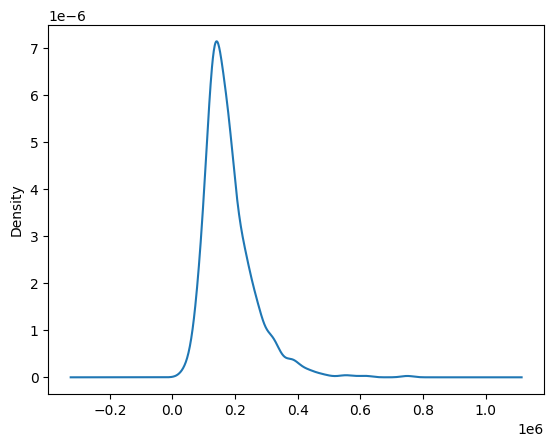

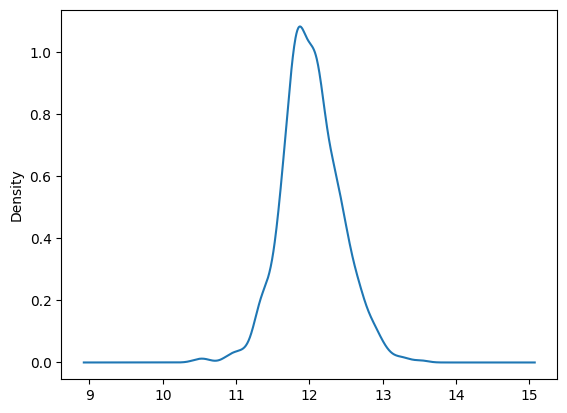

0.13968123353646156

In [53]:
# Step 1: Separate the training and test data based on the 'group' column.
# 'SalePrice' is missing in the test data, so we use it to differentiate between train and test datasets.
train = df[df["group"] == "train"].drop("group", axis=1)
test = df[df["group"] == "test"].drop(["group", "SalePrice"], axis=1)

# Identify columns in 'train' that contain spaces in their names.
train.columns[train.columns.str.contains(" ")]

# Replace spaces with underscores in column names for both 'train' and 'test' DataFrames.
train.columns = [col.replace(" ", "_") for col in train.columns]
test.columns = [col.replace(" ", "_") for col in test.columns]

# Step 2: Train a model using the training data and evaluate its performance.
# Bonus: Build the model using a log transformation of the target variable (SalePrice) and observe the RMSE results.
# Note: Remember to inverse the log transformation to interpret the predictions properly.

# Import required libraries for train-test split and error calculation.
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Visualize the distribution of the target variable 'SalePrice' using Kernel Density Estimation (KDE) plot.
train["SalePrice"].plot(kind="kde")
plt.show()

# Define features 'X' by dropping 'SalePrice' and define the log-transformed target variable 'y'.
X = train.drop(["SalePrice"], axis=1)
y = np.log(train["SalePrice"])

# Plot the distribution of the log-transformed target variable using a KDE plot.
y.plot(kind="kde")
plt.show()

# Split the training data into training and validation sets.
# Use 80% of data for training and 20% for testing, with a fixed random state for reproducibility.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Import the LightGBM library and define the LightGBM regressor with the RMSE objective.
import lightgbm
lgb = lightgbm.LGBMRegressor(objective='root_mean_squared_error', verbose=-1)

# Train the LightGBM model on the training set.
lgb.fit(X_train, y_train)

# Calculate the RMSE of the model's predictions on the test set using the inverse of the log transformation.
mean_squared_error(y_test, lgb.predict(X_test), squared=False)

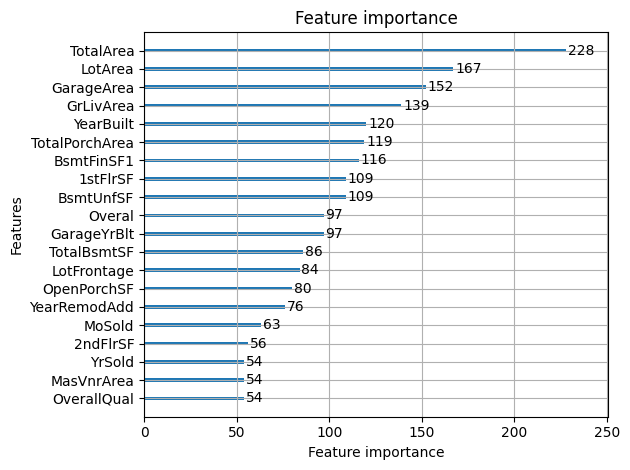

In [54]:
# Plot the feature importances of the trained LightGBM model.
# 'max_num_features' limits the plot to show only the top 20 most important features.
# 'lgb' refers to the trained LightGBM model.
lightgbm.plot_importance(lgb, max_num_features=20);

# Adjust the layout of the plot to ensure that labels and elements fit well within the figure area.
plt.tight_layout()

# Display the plot of feature importances.
plt.show()

In [55]:
# Import the XGBoost library.
import xgboost

# Initialize an XGBoost Regressor with the squared error objective function.
xgb = xgboost.XGBRegressor(objective='reg:squarederror')

# Fit the model using the training data (X_train, y_train).
xgb.fit(X_train, y_train)

# Calculate the Root Mean Squared Error (RMSE) on the test set.
# This evaluates how well the model's predictions match the actual test data.
mean_squared_error(y_test, xgb.predict(X_test), squared=False) 
# Output: 0.14947492391185338 (This is the RMSE value for the model)

0.14947492391185338

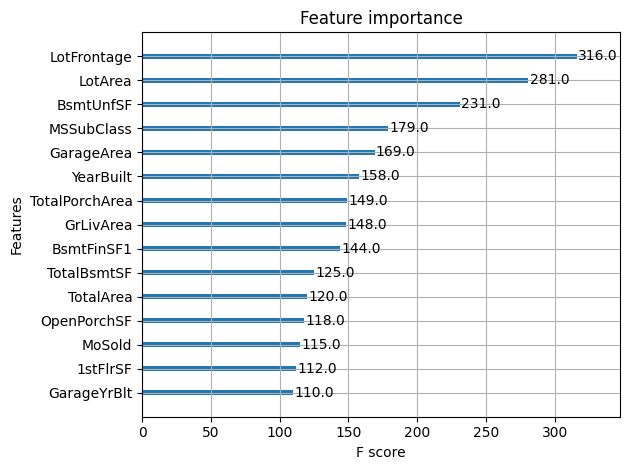

In [56]:
# Plot the feature importances of the trained XGBoost model.
# 'max_num_features' limits the plot to the top 15 most important features.
xgboost.plot_importance(xgb, max_num_features=15);

# Adjust the plot layout to ensure all elements fit within the figure area.
plt.tight_layout()

# Display the plot of feature importances.
plt.show()

In [57]:
# Import the MinMaxScaler from scikit-learn, which scales features to a given range, here (0,1).
from sklearn.preprocessing import MinMaxScaler

# Create a DataFrame containing feature importances from the LightGBM model, indexed by feature names.
lgb_importances = pd.DataFrame(dict(lgbm=lgb.feature_importances_), index=lgb.feature_name_)

# Create a DataFrame containing feature importances from the XGBoost model, indexed by feature names.
xgb_importances = pd.DataFrame(dict(xgb=xgb.feature_importances_), index=xgb.feature_names_in_)

# Concatenate the LightGBM and XGBoost importances into a single DataFrame.
importances = pd.concat([lgb_importances, xgb_importances], axis=1)

# Initialize the MinMaxScaler to scale values between 0 and 1.
min_max = MinMaxScaler((0, 1))

# Create a new column "cross" that combines the scaled feature importances from both models.
# It multiplies the scaled LightGBM importances with the scaled XGBoost importances.
importances["cross"] = min_max.fit_transform(importances[["lgbm"]]) * min_max.fit_transform(importances[["xgb"]])

# Sort the DataFrame based on the "cross" column in descending order and reset the index.
sorted = importances.sort_values(by="cross", ascending=False).reset_index()

# Display the top 20 features based on the combined importances.
sorted.head(20)


,index,lgbm,xgb,cross
0,TotalArea,228,0.113670,0.417372
1,OverallQual,54,0.272347,0.236842
2,Overal,97,0.022946,0.035845
3,CentralAir_N,13,0.119742,0.025069
4,GarageCars,24,0.054464,0.021051
5,TotalBathrooms,52,0.015784,0.013218
6,YearBuilt,120,0.004964,0.009594
7,MSZoning_RM,13,0.045695,0.009567
8,BsmtFinSF1,116,0.003358,0.006273
9,GrLivArea,139,0.002801,0.006270


In [58]:
# Calculate the percentage of values in the "HasPool" column and display it.
df["HasPool"].value_counts() / len(df) * 100

# Find and display the feature importance information for features that contain "HasPool" in their name.
sorted[sorted["index"].str.contains("HasPool")]

,index,lgbm,xgb,cross
162,HasPool,0,0.0,0.0


In [59]:
def drop_calculate():
    # Initialize a dictionary to store the RMSE scores after dropping each feature.
    attempts = {}
    # Define a threshold for the best score; here, it is initially set to 0.5.
    best_score = 0.5
    
    # Split the data into training and testing sets.
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Import tqdm for showing a progress bar during iterations.
    from tqdm.auto import tqdm
    
    # Iterate over the number of features, dropping one feature at a time.
    for i in tqdm(range(1, len(X_train.columns))):
        # Identify the feature to drop, starting with the least important feature.
        drop_col = sorted.iloc[len(sorted) - i]["index"]
        
        # Drop the identified feature from both training and testing sets.
        X_train.drop(drop_col, axis=1, inplace=True)
        X_test.drop(drop_col, axis=1, inplace=True)

        # Train the LightGBM model on the reduced feature set.
        lgb.fit(X_train, y_train)
        # Make predictions on the test set.
        y_pred = lgb.predict(X_test)
        # Calculate the RMSE score for the current model.
        score = mean_squared_error(y_test, y_pred, squared=False)

        # Store the score with the corresponding iteration.
        attempts[i] = score

        # Update the best score if the current score is lower.
        if score < best_score:
            best_score = score
    
    # Convert the attempts dictionary to a DataFrame, sort by RMSE results, and return the top 10 results.
    return pd.DataFrame(attempts.values(), index=attempts.keys(), columns=['Results']).sort_values(by="Results", ascending=True).head(10)

# Call the function to perform the iterative feature-dropping process.
drop_calculate()

# Split the data again into training and testing sets to ensure consistency.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Drop the last 95 features with the lowest importance from training, testing, and test datasets.
X_train.drop(sorted.tail(95)["index"], axis=1, inplace=True)
X_test.drop(sorted.tail(95)["index"], axis=1, inplace=True)
test.drop(sorted.tail(95)["index"], axis=1, inplace=True)

  0%|          | 0/170 [00:00<?, ?it/s]

In [60]:
from lightgbm import LGBMRegressor
import optuna

# Define an objective function for the optimization process using Optuna
def objective_lgb(trial):
    """Define the objective function"""
    
    # Define a set of hyperparameters to be tuned by the Optuna trial.
    params = {
        # Set the main objective for optimization; in this case, minimizing RMSE.
        'objective': trial.suggest_categorical('objective', ['root_mean_squared_error']),
        
        # Suggest a value for the maximum depth of each tree to control overfitting.
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        
        # Suggest a learning rate, controlling how much the model learns with each iteration.
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.1),
        
        # Suggest the number of boosting iterations.
        'n_estimators': trial.suggest_int('n_estimators', 300, 700),
        
        # Suggest the fraction of features to be used for each iteration.
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 1),
        
        # L1 regularization parameter to help reduce overfitting.
        'lambda_l1': trial.suggest_float('lambda_l1', 0, 1),
        
        # L2 regularization parameter to help reduce overfitting.
        'lambda_l2': trial.suggest_float('lambda_l2', 0, 1),
        
        # Set a fixed random seed for reproducibility.
        "random_state" : trial.suggest_categorical('random_state', [42]),
        
        # Control the verbosity of LightGBM's logging.
        'verbose': trial.suggest_categorical('verbose', [-1]),
    }

    # Create an LGBMRegressor model with the suggested parameters.
    model_lgb = LGBMRegressor(**params)
    
    # Fit the model on the training data.
    model_lgb.fit(X_train, y_train)
    
    # Predict on the test set.
    y_pred = model_lgb.predict(X_test)
    
    # Return the RMSE (Root Mean Squared Error) as the objective to be minimized.
    return mean_squared_error(y_test, y_pred, squared=False)

# Create an Optuna study to minimize the objective function (minimize RMSE).
study_lgb = optuna.create_study(direction='minimize')

# Set the logging level of Optuna to suppress output during trials.
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Run the study to optimize the objective function over 100 trials, with a progress bar.
study_lgb.optimize(objective_lgb, n_trials=100, show_progress_bar=True)

[I 2024-10-23 00:28:44,327] A new study created in memory with name: no-name-1b4de4d6-f7eb-4c87-8d07-ed5ffa876f0f


  0%|          | 0/100 [00:00<?, ?it/s]

In [61]:
# Print the best parameters
study_lgb.best_params

{'objective': 'root_mean_squared_error',
 'max_depth': 10,
 'learning_rate': 0.030819648302528105,
 'n_estimators': 556,
 'feature_fraction': 0.19388923199091765,
 'lambda_l1': 0.07592408010358227,
 'lambda_l2': 0.8097800997489576,
 'random_state': 42,
 'verbose': -1}

In [62]:
# Initialize the LightGBM regressor using the best hyperparameters found by the Optuna study.
lgb = LGBMRegressor(**study_lgb.best_params)

# Fit the model on the training data using the best hyperparameters.
lgb.fit(X_train, y_train)

# Make predictions on the test data using the trained model.
y_pred = lgb.predict(X_test)

# Calculate and print the RMSE (Root Mean Squared Error) to evaluate the model's performance on the test set.
print('Error: ', mean_squared_error(y_test, y_pred, squared=False))

Error:  0.13418035103995768


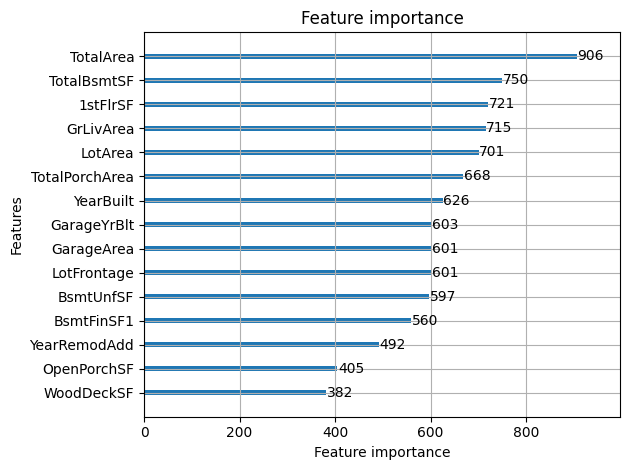

In [63]:
# Plot the feature importance for the trained LightGBM model.
# 'max_num_features = 15' limits the plot to show the top 15 most important features.
lightgbm.plot_importance(lgb, max_num_features=15)

# Adjust the layout of the plot to ensure everything fits well without overlapping.
plt.tight_layout()

# Display the plot.
plt.show()

In [64]:
# Create a DataFrame to display the feature importance values from the trained LightGBM model.
# 'lgb.feature_importances_' provides the importance scores of each feature.
# 'index=lgb.feature_name_' sets the feature names as the index of the DataFrame.
# 'dict(lgbm = lgb.feature_importances_)' creates a dictionary with the feature importance values for the "lgbm" model.
# 'sort_values(by="lgbm", ascending=False)' sorts the DataFrame in descending order to show the most important features first.
# 'head(20)' displays the top 20 most important features.
pd.DataFrame(dict(lgbm=lgb.feature_importances_), index=lgb.feature_name_).sort_values(by="lgbm", ascending=False).head(20)

,lgbm
TotalArea,906
TotalBsmtSF,750
1stFlrSF,721
GrLivArea,715
LotArea,701
TotalPorchArea,668
YearBuilt,626
GarageYrBlt,603
LotFrontage,601
GarageArea,601


In [65]:
# Apply the exponential function (np.exp) to the predictions from the LightGBM model.
# This is done to reverse the logarithmic transformation applied earlier to the target variable (SalePrice).
# 'lgb.predict(test)' generates predictions for the test data using the trained LightGBM model.
# Store the transformed predictions in the "SalePrice" column of the 'sub' DataFrame.

sub["SalePrice"] = np.exp(lgb.predict(test))

# Save the 'sub' DataFrame as a CSV file named 'submission.csv'.
# 'index=False' ensures that the DataFrame's index is not written to the CSV file.
sub.to_csv('submission.csv', index=False)

# Display the 'sub' DataFrame to review the final submission data.
sub

,Id,SalePrice
0,1461,121146.139614
1,1462,161501.011468
2,1463,178101.470544
3,1464,194394.262706
4,1465,186394.207931
...,...,...
1454,2915,83747.932078
1455,2916,85991.634418
1456,2917,165634.084725
1457,2918,127553.302648
